# PID Control
*Kevin Wu, Irene Madejski, Bayard Walsh*

#### PID Control (25 points)
- Implement PID control in the `Heating_Process.pid_controller` function (10 points).
- Using the function calls below (including changes in setpoint and several kicks), identify values of $K_p, K_i, K_d \neq 0$ that provide ideal control. See `pid_example.png` for an example of what a suitable level of control looks like. Hint: differences are often an order of magnitude, so $K_p \approx 10 K_i \approx 100 K_d$ (5 points).
- Once suitable conditions are identified for the PID controller, increase and decrease the values of $K_p,K_i,K_d$ until abberant behavior occurs. For all eight cases, describe what went wrong and why (10 points).

In [86]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150

## PID Control

Code included in the assignment

In [87]:
class Heating_Process:
    '''
    A simple heating process for a pot of water, with inlet/outlet.
    '''
    def __init__(self,init_temp,set_temp,Kp,Ki,Kd):
        '''
        Initialize pre-sets.
        Parameters
        ----------
            init_temp (float): Initial temperature of the vessel
            set_temp (float): Setpoint temperature of the vessel
            Kp (float): Proportional control constant
            Ki (float): Integral control constant
            Kd (float): Derivative control constant
        Returns
        -------
            None
        '''
        self.temp_list = [init_temp]
        self.sp_temp_list = [set_temp]
        self.iter_from=0
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
    
    def pid_controller(self):
        '''
        Main controller for the heating vessel.
        Parameters
        ----------
            None
        Returns
        -------
            final_control (float): Temperature response change from PID controller
        '''
        proportional = self.Kp*(self.sp_temp_list[-1]-self.temp_list[-1])
        integral = self.Ki*np.sum(np.array(self.sp_temp_list[self.iter_from:])-np.array(self.temp_list[self.iter_from:]))
        if len(self.temp_list) < 2:
            derivative = 0
        else:
            derivative = self.Kd*(self.temp_list[-1]-self.temp_list[-2])
        final_control = proportional + integral + derivative
        return final_control
    
    def time_steps(self,n_steps=100,T_max=np.inf):
        '''
        Iterate over a fixed number of time steps for PID control.
        Parameters
        ----------
            n_steps (int): Number of time steps to iterate over
            T_max (float): Maximum allowable temperature swing over a single time step (defaults to np.inf)
        Returns
        -------
            None
        '''
        for _ in range(n_steps):
            new_T = self.pid_controller()
            if new_T<-T_max:
                new_T = -T_max
            if new_T>T_max:
                new_T=T_max
            self.temp_list.append(self.temp_list[-1]+new_T + np.random.normal(0,0.1))
            self.sp_temp_list.append(self.sp_temp_list[-1])
    
    def preset_kick(self,kick_temp,kick_duration=5):
        '''
        Introduce a "kick" in the temperature, perhaps by introducing ice water or tea kettle water
        Parameters
        ----------
            kick_temp (float): New temperature introduced by the kick
            kick_duration (int): Number of time steps the kick lasts, before control is regained
        Returns
        -------
            None
        '''
        for i in range(kick_duration):
            self.temp_list.append(kick_temp)
            self.sp_temp_list.append(self.sp_temp_list[-1])
    
    def new_setpoint(self,sp_temp):
        '''
        Change the setpoint temperature of the heating vessel.
        Paramters
        ---------
            sp_temp (float): New set point temperature.
        Returns
        -------
            None
        '''
        self.sp_temp_list[-1] = sp_temp
        self.iter_from=len(self.sp_temp_list)


def simulate_heating(Kp,Ki,Kd):
    '''
    Simulate a heating process with a PID controller.
    Parameters
    ----------
        Kp (float): Proportional control constant
        Ki (float): Integral control constant
        Kd (float): Derivative control constant
    Returns
    -------
        None
    '''
    HP = Heating_Process(50,100,Kp,Ki,Kd)
    HP.time_steps(100)
    HP.preset_kick(120)
    HP.time_steps(100)
    HP.new_setpoint(90)
    HP.time_steps(100)
    HP.preset_kick(100)
    HP.time_steps(100)
    plt.figure(figsize=(5, 3))
    plt.plot(HP.temp_list,label='Actual Temperature')
    plt.plot(HP.sp_temp_list,label='True Setpoint')
    plt.legend()
    plt.grid()
    plt.xlabel('Time')
    plt.ylabel('Temperature')
    plt.title('PID Controller with Kp={}, Ki={}, Kd={}'.format(Kp,Ki,Kd))
    plt.show()

## PID Control Solutions

### Part 1: Implement PID Control

See above `Heating_Process.pid_controller` function.

### Part 2: Identify Ideal Control

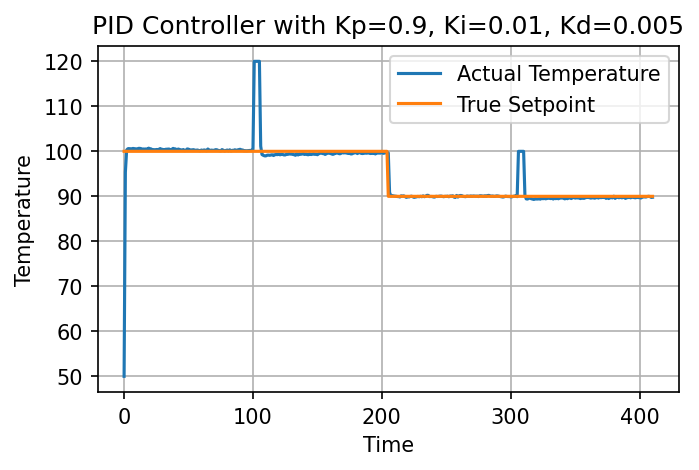

In [88]:
simulate_heating(0.9,0.01,0.005)

### Part 3: Aberrant Behavior

#### Case 1: Loweing $K_p$

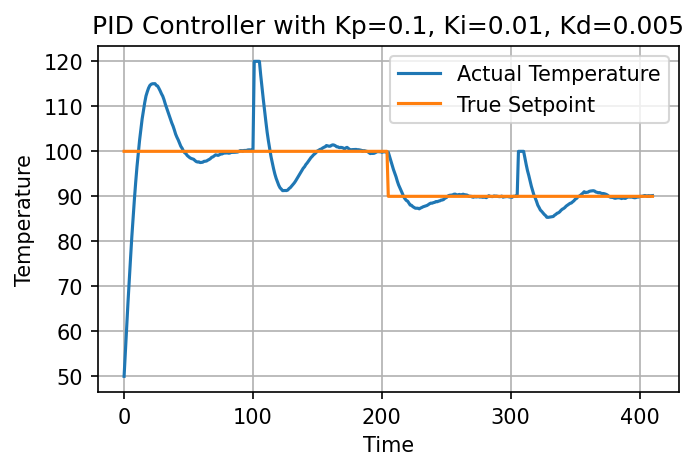

In [97]:
simulate_heating(0.1,0.01,0.005)

#### Case 2: Raising $K_p$

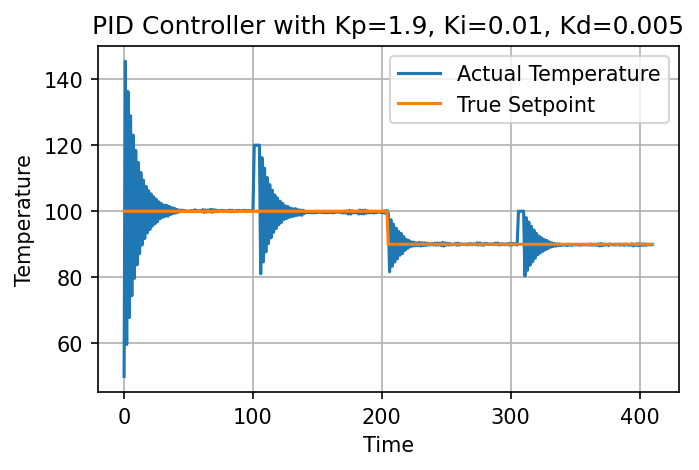

In [142]:
simulate_heating(1.9,0.01,0.005)

#### Case 3: Lowering $K_i$

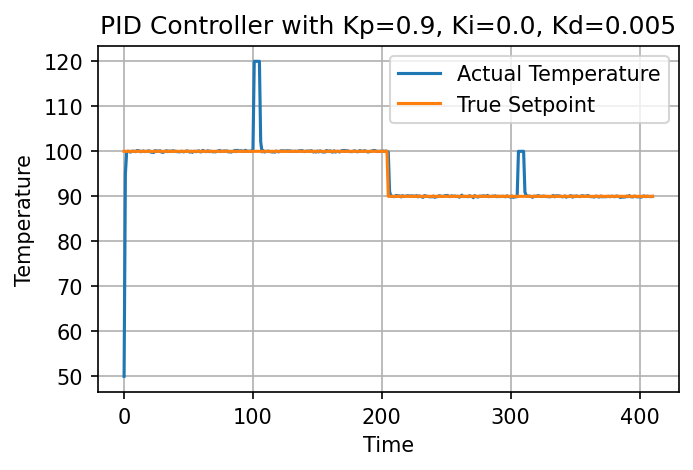

In [153]:
simulate_heating(0.9,0.0,0.005)

#### Case 4: Raising $K_i$

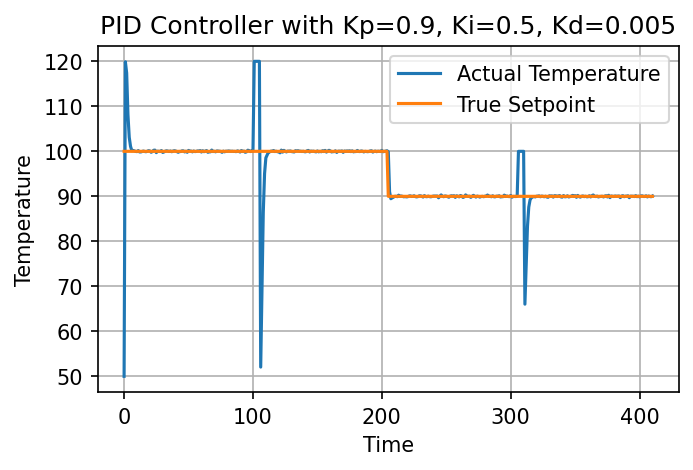

In [151]:
simulate_heating(0.9,0.5,0.005)

#### Case 5: Lowering $K_d$

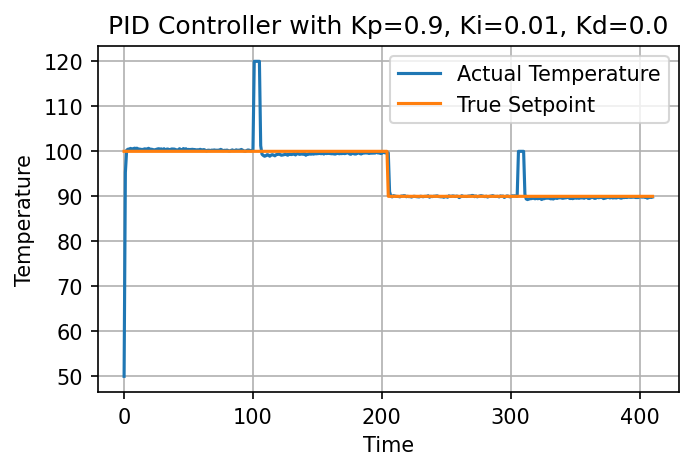

In [123]:
simulate_heating(0.9,0.01,0.0)

#### Case 6: Raising $K_d$

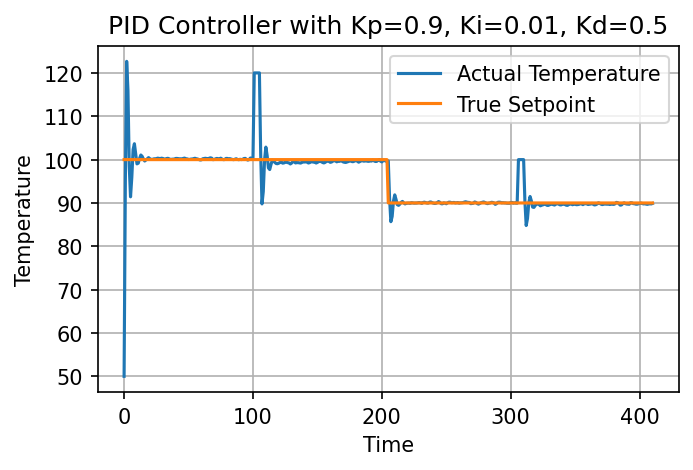

In [128]:
simulate_heating(0.9,0.01,0.5)

#### Case 7: Lowering all $K_p, K_i, K_d$

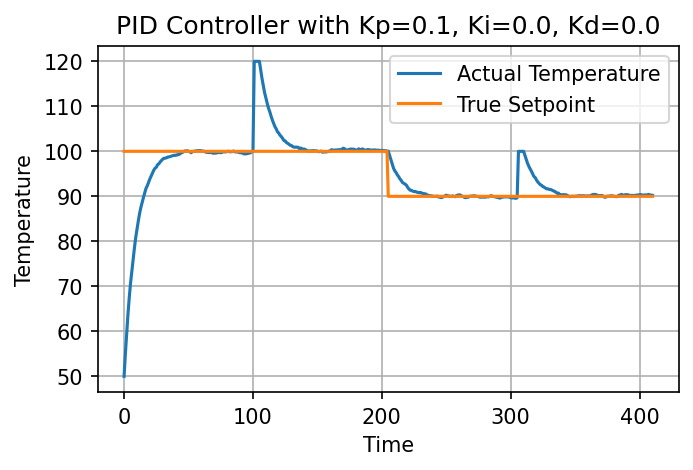

In [154]:
simulate_heating(0.1,0.0,0.0)

#### Case 8: Raising all $K_p, K_i, K_d$

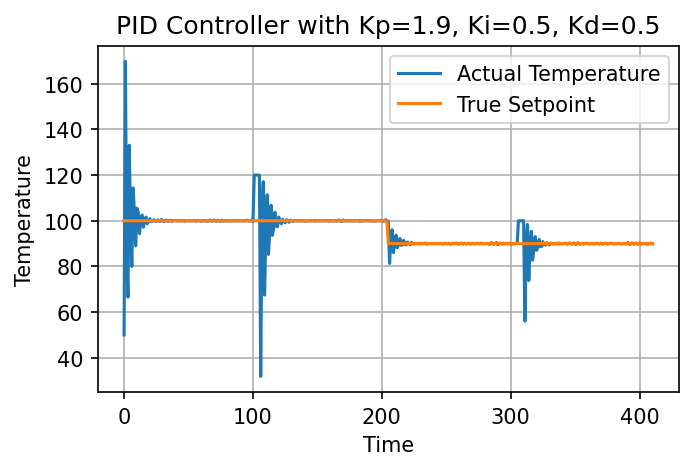

In [156]:
simulate_heating(1.9,0.5,0.5)